In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, IntSlider


In [13]:
img = cv2.imread('/content/00000059_jpg.rf.755e9674fa8550971918a53b8edffa70.jpg')

def adjust_hsv(hue, hue_range, saturation, saturation_range, value, value_range):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    lower_bound = np.array([hue - hue_range, saturation - saturation_range, value - value_range])
    upper_bound = np.array([hue + hue_range, saturation + saturation_range, value + value_range])

    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    result = cv2.bitwise_and(img, img, mask=mask)

    plt.figure(figsize=(12, 6))
    plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Originalna slika')
    plt.axis('off')
    plt.subplot(122), plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)), plt.title('Detektovani pikavci')
    plt.axis('off')
    plt.show()

    return mask

# Interaktivno podešavanje parametara HSV
mask = interact(adjust_hsv,
         hue=IntSlider(min=0, max=180, step=1, value=20, description='Hue'),
         hue_range=IntSlider(min=0, max=50, step=1, value=12, description='Hue Range'),
         saturation=IntSlider(min=0, max=255, step=1, value=245, description='Saturation'),
         saturation_range=IntSlider(min=0, max=100, step=1, value=100, description='Saturation Range'),
         value=IntSlider(min=0, max=255, step=1, value=240, description='Value'),
         value_range=IntSlider(min=0, max=100, step=1, value=100, description='Value Range'))

interactive(children=(IntSlider(value=20, description='Hue', max=180), IntSlider(value=12, description='Hue Ra…

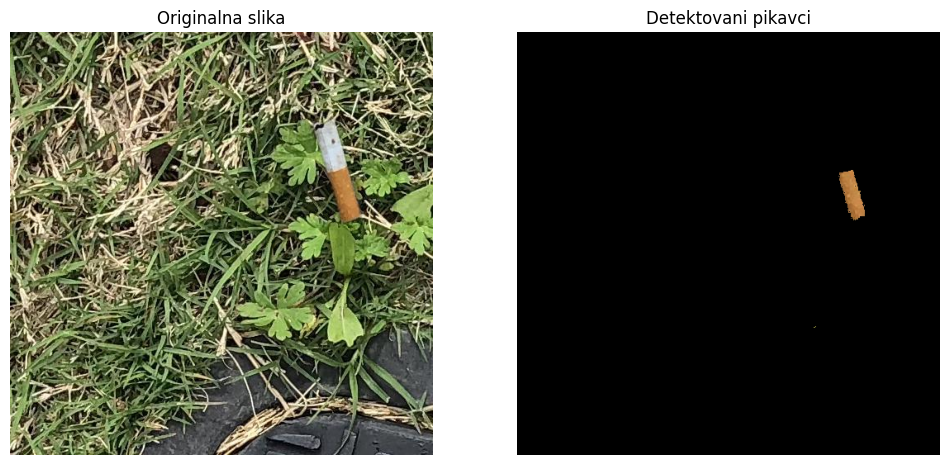

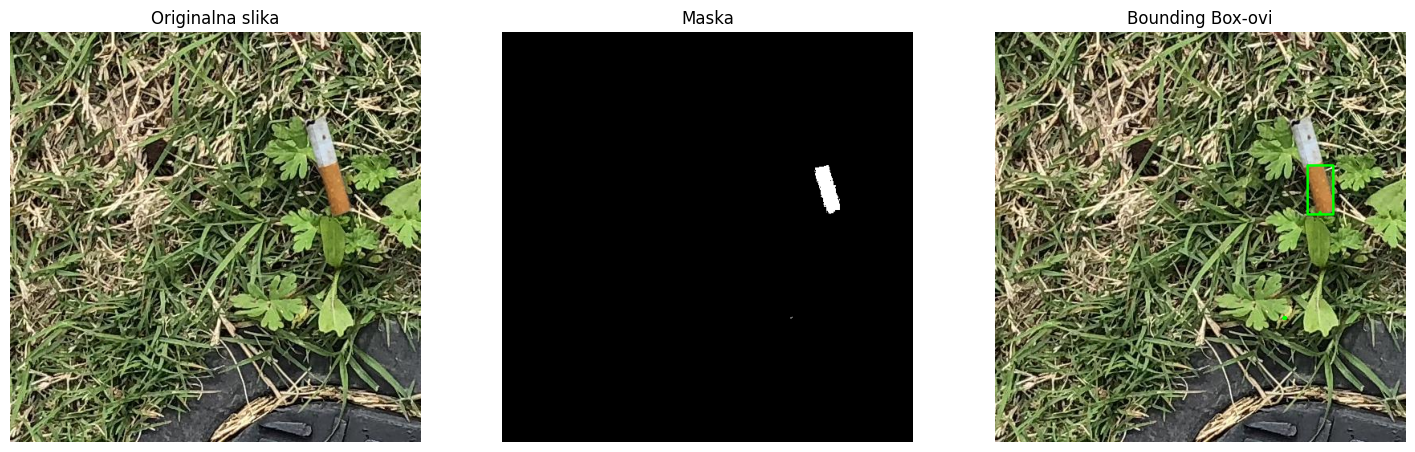

In [14]:
def draw_bounding_boxes(mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    img_with_boxes = img.copy()

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

    plt.figure(figsize=(18, 6))
    plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Originalna slika')
    plt.axis('off')
    plt.subplot(132), plt.imshow(mask, cmap='gray'), plt.title('Maska')
    plt.axis('off')
    plt.subplot(133), plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)), plt.title('Bounding Box-ovi')
    plt.axis('off')
    plt.show()

mask = adjust_hsv(20, 12, 245, 100, 240, 100)  # Ovde unesite vrednosti koje ste podesili
draw_bounding_boxes(mask)
